## Importing Libraries

In [22]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [24]:
# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)  # Choosing 10 components for illustration
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

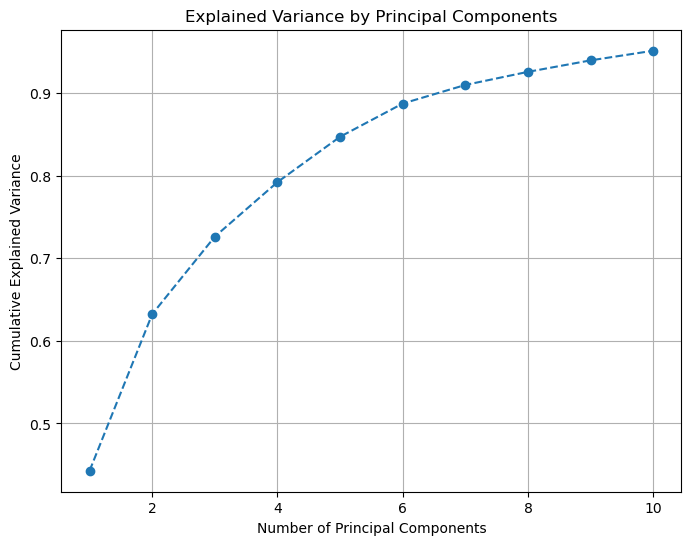

In [25]:
# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [26]:
# Create a DataFrame with PCA components and feature names
pca_components_df = pd.DataFrame(pca.components_, columns=feature_names)

In [27]:
# Display the first few rows of the PCA components
pca_components_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
2    -0.008531      0.064550       -0.009314   0.028700        -0.104292   
3     0.041409     -0.603050        0.041983   0.053434         0.159383   
4     0.037786     -0.049469        0.037375   0.010331        -0.365089   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   
2         -0.074092        0.002734            -0.025564      -0.040240   
3          0.031795        0.019123             0.065336       0.067125   
4          0.011704        0.086375            -0.043861      -0.305941   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.064363  ...      0.227997       0.104469         0.236640   
1                0.366575  ...     -0.219866      -0.045467        -0.199878   
2               -0.022574  ...     -0.047507      -0.042298        -0.048547   
3                0.048587  ...      0.015417      -0.632808         0.013803   
4               -0.044424  ...     -0.004407      -0.092883         0.007454   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.224871          0.127953           0.210096         0.228768   
1   -0.219352          0.172304           0.143593         0.097964   
2   -0.011902         -0.259798          -0.236076        -0.173057   
3    0.025895          0.017652          -0.091328        -0.073951   
4   -0.027391         -0.324435           0.121804         0.188519   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.250886        0.122905                 0.131784  
1             -0.008257        0.141883                 0.275339  
2             -0.170344       -0.271313                -0.232791  
3              0.006007       -0.036251                -0.077053  
4              0.043332       -0.244559                 0.094423  

[5 rows x 30 columns]

In [10]:
# Identify essential variables for the first principal component
essential_variables_pc1 = pca_components_df.iloc[0].sort_values(ascending=False)

In [11]:
# Print the essential variables for the first principal component
print("Essential variables for the first principal component:")
print(essential_variables_pc1)

Essential variables for the first principal component:
mean concave points        0.260854
mean concavity             0.258400
worst concave points       0.250886
mean compactness           0.239285
worst perimeter            0.236640
worst concavity            0.228768
worst radius               0.227997
mean perimeter             0.227537
worst area                 0.224871
mean area                  0.220995
mean radius                0.218902
perimeter error            0.211326
worst compactness          0.210096
radius error               0.205979
area error                 0.202870
concave points error       0.183417
compactness error          0.170393
concavity error            0.153590
mean smoothness            0.142590
mean symmetry              0.138167
worst fractal dimension    0.131784
worst smoothness           0.127953
worst symmetry             0.122905
worst texture              0.104469
mean texture               0.103725
fractal dimension error    0.102568
mean frac

## Dimensionality Reduction

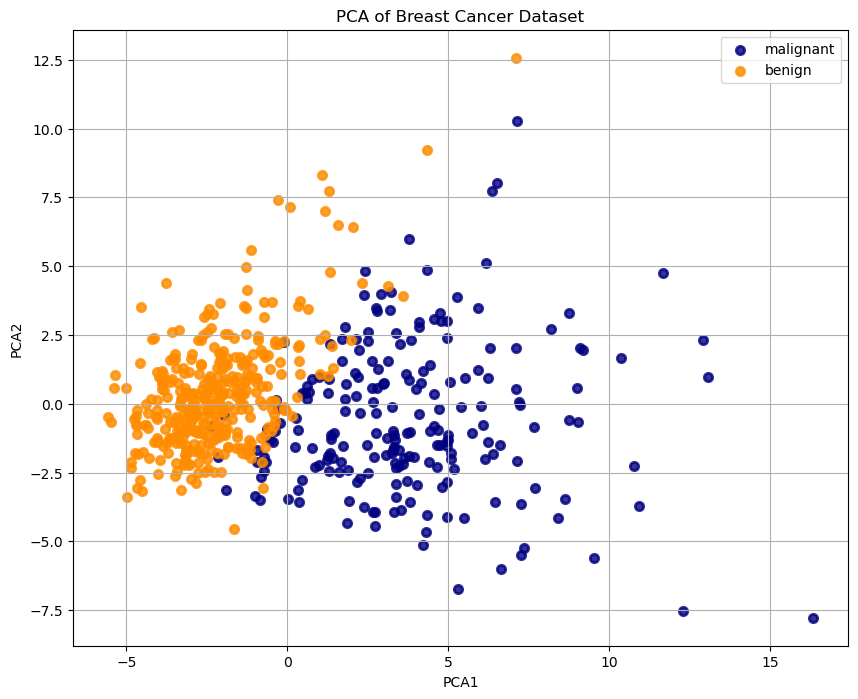

Explained variance by PCA1: 0.44
Explained variance by PCA2: 0.19


In [21]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['target'] = y

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plot the PCA results
plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], cancer.target_names):
    plt.scatter(pca_df.loc[pca_df['target'] == i, 'PCA1'], pca_df.loc[pca_df['target'] == i, 'PCA2'],
                color=color, alpha=0.8, lw=lw, label=target_name)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Breast Cancer Dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid()
plt.show()

# Print explained variance
print(f"Explained variance by PCA1: {explained_variance[0]:.2f}")
print(f"Explained variance by PCA2: {explained_variance[1]:.2f}")

## Logic Regression

Accuracy: 0.9912280701754386
Precision: 0.9861111111111112
Recall: 1.0
Confusion Matrix:
 [[42  1]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



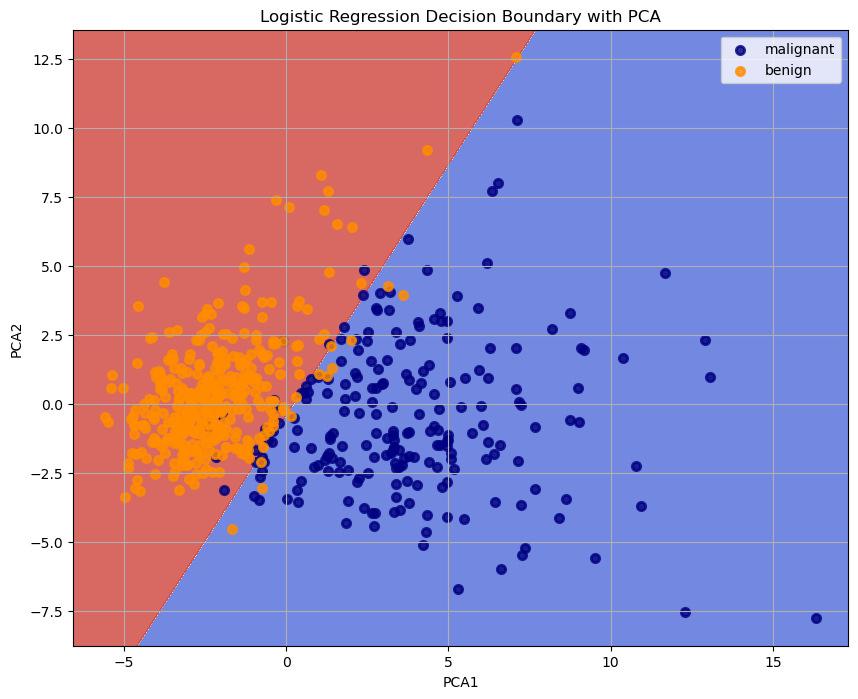

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualize the decision boundary
plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange']
lw = 2

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the data points
for color, i, target_name in zip(colors, [0, 1], cancer.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Logistic Regression Decision Boundary with PCA')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid()
plt.show()